# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [28]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]
data_range

[-6, 12]

In [30]:
np.unique(data['x1_train']) ,np.unique(data['x2_train'])# 19个unique的值 每一个值作为一个feature

(array([ 3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8),
 array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12], dtype=int16))

In [31]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)
train_x

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   8.,
         62., 133., 128.,  61.,   6.,   1.,   0.,   0.],
       [  1.,   3.,   3.,   9.,  13.,  45.,  57.,  71.,  98.,  98.,  99.,
        104.,  77.,  54.,  30.,  17.,  14.,   4.,   3.]])

## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

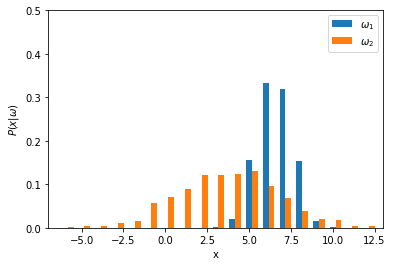

array([[0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.0025 , 0.02   , 0.155  , 0.3325 , 0.32   ,
        0.1525 , 0.015  , 0.0025 , 0.     , 0.     ],
       [0.00125, 0.00375, 0.00375, 0.01125, 0.01625, 0.05625, 0.07125,
        0.08875, 0.1225 , 0.1225 , 0.12375, 0.13   , 0.09625, 0.0675 ,
        0.0375 , 0.02125, 0.0175 , 0.005  , 0.00375]])

In [32]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()
l

In [33]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
x1_test_result = [l[0, sample - data_range[0]] > l[1, sample - data_range[0]] for sample in x1_test[0,:]]
x2_test_result = [l[1, sample - data_range[0]] > l[0, sample - data_range[0]] for sample in x2_test[0,:]]

x1_test_false_sample_number = len(list(filter(lambda x: not x, x1_test_result)))
x2_test_false_sample_number = len(list(filter(lambda x: not x, x2_test_result)))
error = (x1_test_false_sample_number + x2_test_false_sample_number) / (x1_test.shape[1] + x2_test.shape[1])
x1_test_false_sample_number ,x2_test_false_sample_number, error

(3, 61, 0.21333333333333335)

## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

In [34]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

IndexError: too many indices for array

In [ ]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
x1_test_result = [p[0, sample - data_range[0]] > p[1, sample - data_range[0]] for sample in x1_test[0,:]]
x2_test_result = [p[1, sample - data_range[0]] > p[0, sample - data_range[0]] for sample in x2_test[0,:]]


x1_test_false_sample_number = len(list(filter(lambda x: not x, x1_test_result)))
x2_test_false_sample_number = len(list(filter(lambda x: not x, x2_test_result)))
error = (x1_test_false_sample_number + x2_test_false_sample_number) / (x1_test.shape[1] + x2_test.shape[1])
x1_test_false_sample_number ,x2_test_false_sample_number, error
# end answer

## Part 3 risk


In [38]:
risk = np.array([[0, 1], [2, 0]])
#get the minimal risk using optimal bayes decision rule and risk weights

# 获取在训练集和测试集上的x分布
all_x_distribution = train_x + test_x

# 计算likelihood
l = likelihood(all_x_distribution)

# 计算evidence
each_class_number = np.sum(all_x_distribution, axis=1)
total = np.sum(all_x_distribution)

C, N = all_x_distribution.shape

prior = each_class_number / total

l_mul_pri = np.zeros((C, N))
for i in range(C):
    l_mul_pri[i, :] = l[i, :] * prior[i]
px = sum(l_mul_pri)

# 计算后验
p = posterior(all_x_distribution)

# 初始化risk
min_risk = 0


for j in range(N):
    # 计算w0 w1的risk
    a1_error = risk[0,0] * p[0, j] + risk[0,1] * p[1, j]
    a2_error = risk[1,0] * p[0, j] + risk[1,1] * p[1, j]

    # 累加risk
    error = min(a1_error, a2_error)
    min_risk += error * px[j]
print(min_risk)

0.24266666666666667
